In [2]:
%load_ext autoreload
%autoreload 2
import sys
import h5py
from tqdm.notebook import tqdm
import scqubits as sq
sys.path.append('..')
filedirectory = "//Users//joancaceres//Documents//FERBO//FB_W10_S4//run2//FBW10S4_"
from src.utilities import *
from scipy.optimize import curve_fit
from src.fitting import get_transitions_from_levels, plot_transitions
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
%matplotlib inline

# Datasets

In [3]:
datasets = {
    'sts_power':        409931,
    'res_fluq':         416866,
    'two_res':          200907,
    'sts_flux':         411703,
    'sts_flux_zoom':    413199,
    'flux_drifting':    421220,
    'sts_power_change': 418329,   
    'sts_power_change2':421479,
    'tts_left':         422696,
    'tts_upper':        422958,
    'tts_lower':        424530,
    'tts_zero':         422231,
    'tts_double':       401277,
    'rabi':             406035,
    'rabi_chevron':     426128,
    't1':               405783,    
    'ramsey':           421172,
    'flux_center':      427297,
}

In [4]:
data = {}
for key, datanumber in tqdm(datasets.items()):
    data[key] = load_data(filedirectory +str(datanumber))
    if 'freq' in data[key]:
        data[key]['freq'] *= 1e-9
    elif 'detuning' in data[key]:
        data[key]['detuning'] *= 1e-6

  0%|          | 0/18 [00:00<?, ?it/s]

# Single tone spectroscopy

## Single tone spectroscopy vs. gain

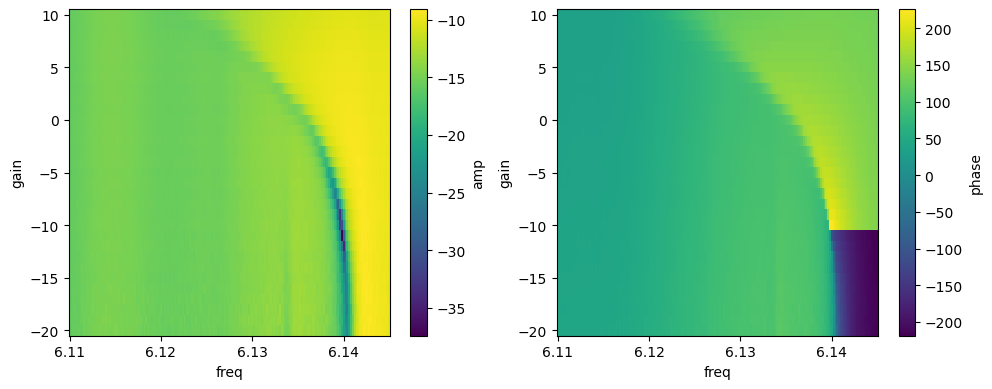

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
plot3D(
    data_dict=data['sts_power'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax[0],
    fig=fig,
)

plot3D(
    data_dict=data['sts_power'],
    x_key='freq',
    y_key='gain',
    z_key='phase',
    ax=ax[1],
    fig=fig,
    )
plt.show()

### Additional resonance

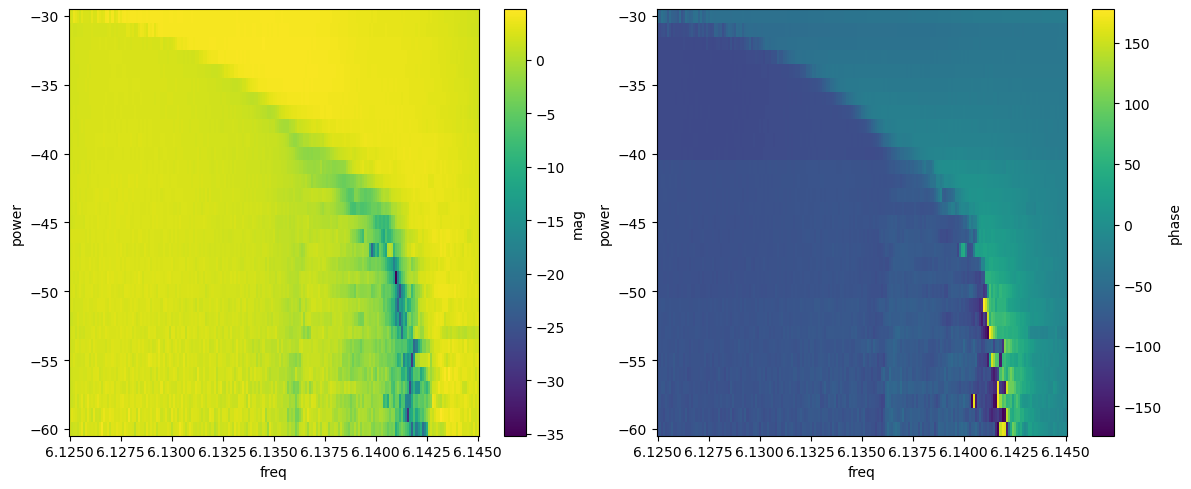

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
plot3D(
    data_dict=data['two_res'],
    x_key='freq',
    y_key='power',
    z_key='mag',
    ax=ax[0],
    fig=fig
)

plot3D(
    data_dict=data['two_res'],
    x_key='freq',
    y_key='power',
    z_key='phase',
    ax=ax[1],
    fig=fig
)
plt.show()

### Resonator frequency fluctuation

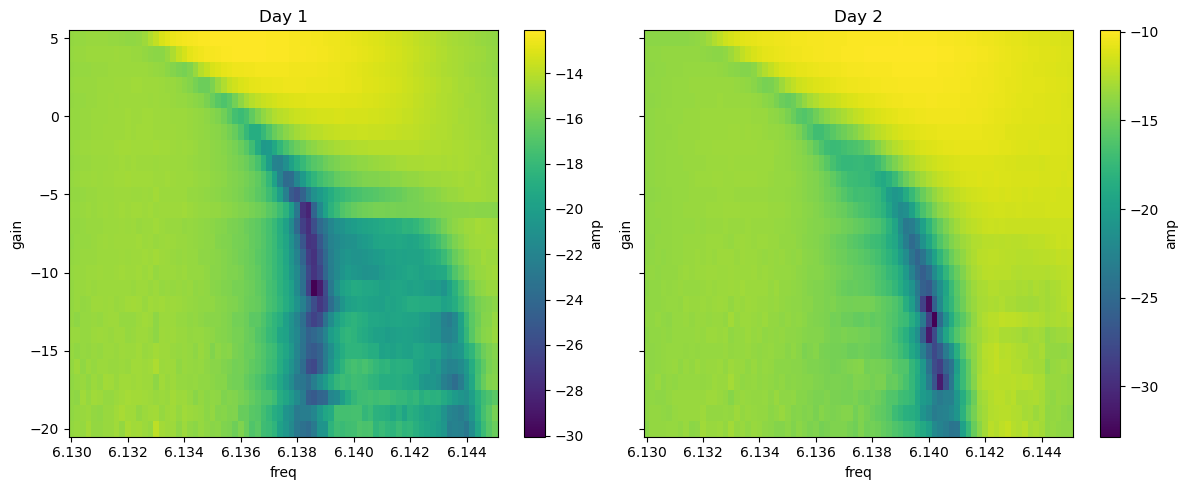

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,5), sharey=True)
ax[0].set_title('Day 1')
ax[1].set_title('Day 2')
plot3D(
    data_dict=data['sts_power_change'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax[0],
    fig=fig
)

plot3D(
    data_dict=data['sts_power_change2'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax[1],
    fig=fig
)
plt.show()

## Single tone spectroscopy vs. flux

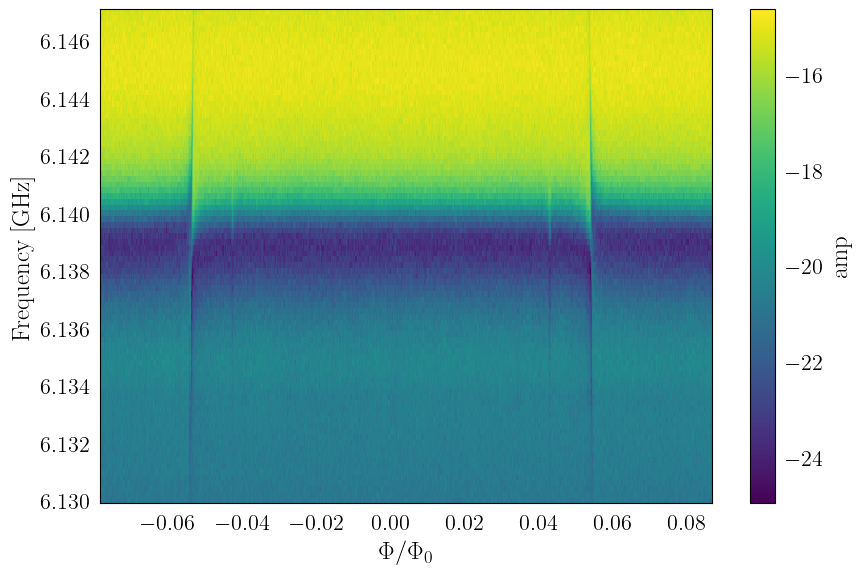

In [149]:
voltage_period = 3.033
zero_flux = 1.5373

for key in ['sts_flux','sts_flux_zoom']:
    data[key]['phi'] = (data[key]['flux']-zero_flux)/voltage_period

fig, ax = plt.subplots(1,1,figsize=(9,6))
plot3D(
    data_dict=data['sts_flux'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
    ax=ax,
    fig=fig
)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
plt.show()

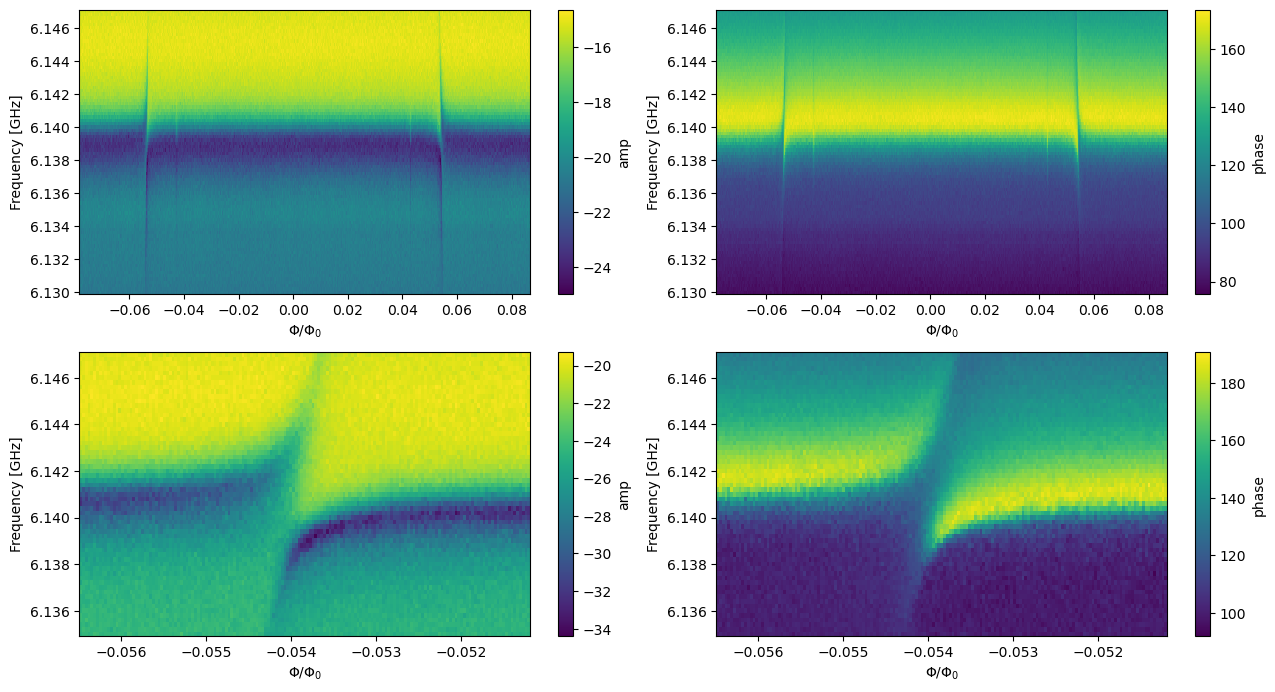

In [17]:
voltage_period = 3.033
zero_flux = 1.5373

for key in ['sts_flux','sts_flux_zoom']:
    data[key]['phi'] = (data[key]['flux']-zero_flux)/voltage_period

fig, ax = plt.subplots(2,2,figsize=(13,7))
plot3D(
    data_dict=data['sts_flux'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
    ax=ax[0,0],
    fig=fig
)

plot3D(
    data_dict=data['sts_flux'],
    x_key='phi',
    y_key='freq',
    z_key='phase',
    ax=ax[0,1],
    fig=fig
)

plot3D(
    data_dict=data['sts_flux_zoom'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
    ax=ax[1,0],
    fig=fig
)

plot3D(
    data_dict=data['sts_flux_zoom'],
    x_key='phi',
    y_key='freq',
    z_key='phase',
    ax=ax[1,1],
    fig=fig
)

for ax in ax.flat:
    ax.set_xlabel(r'$\Phi/\Phi_0$')
    ax.set_ylabel('Frequency [GHz]')

plt.show()

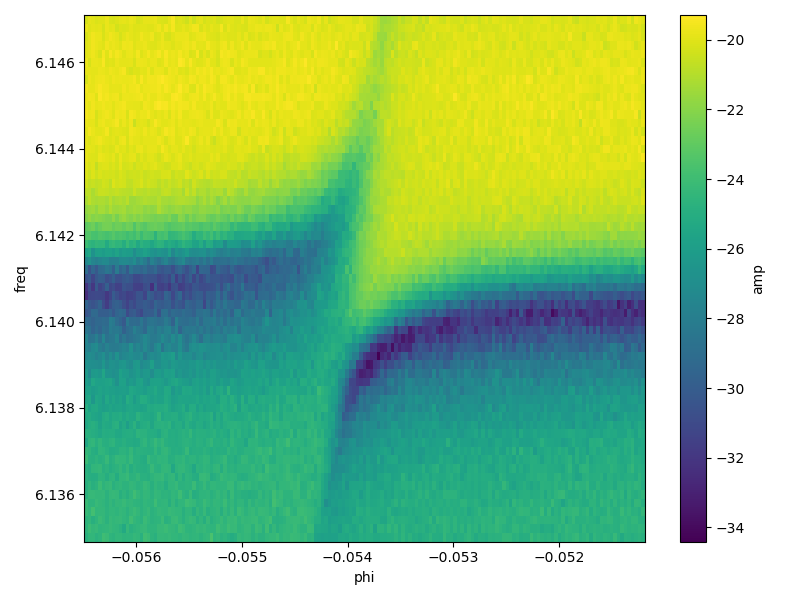

In [27]:
plot3D(
    data_dict=data['sts_flux_zoom'],
    x_key='phi',
    y_key='freq',
    z_key='amp',
)
plt.show()

### Resonance fluctiation pt2

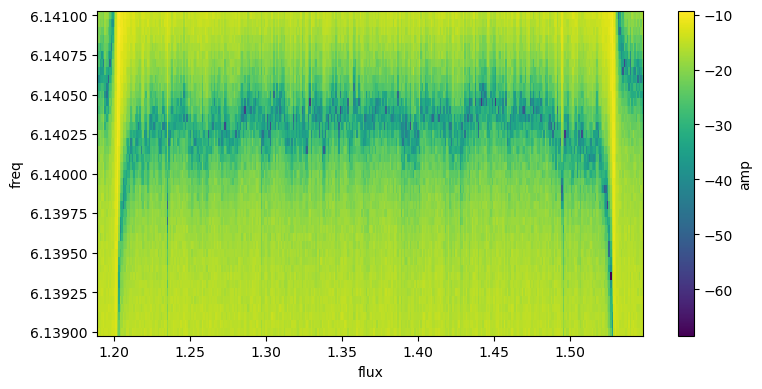

In [18]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
plot3D(
    data_dict=data['res_fluq'],
    x_key='flux',
    y_key='freq',
    z_key='amp',
    ax=ax,
    fig=fig
)
plt.show()

# Two tone spectroscopy

## Fixing first tone

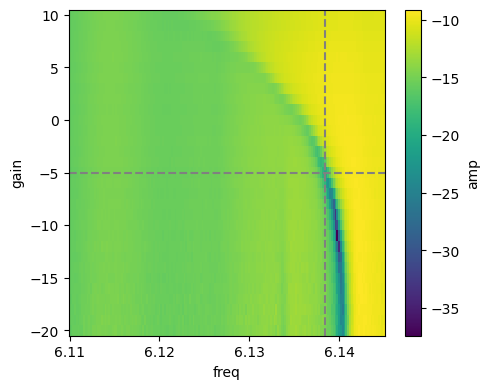

In [19]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
plot3D(
    data_dict=data['sts_power'],
    x_key='freq',
    y_key='gain',
    z_key='amp',
    ax=ax,
    fig=fig,
)
ax.axhline(y=-5,linestyle='dashed', color='gray')
ax.axvline(x=data['sts_power']['freq'][0,142],linestyle='dashed', color='gray')
plt.show()

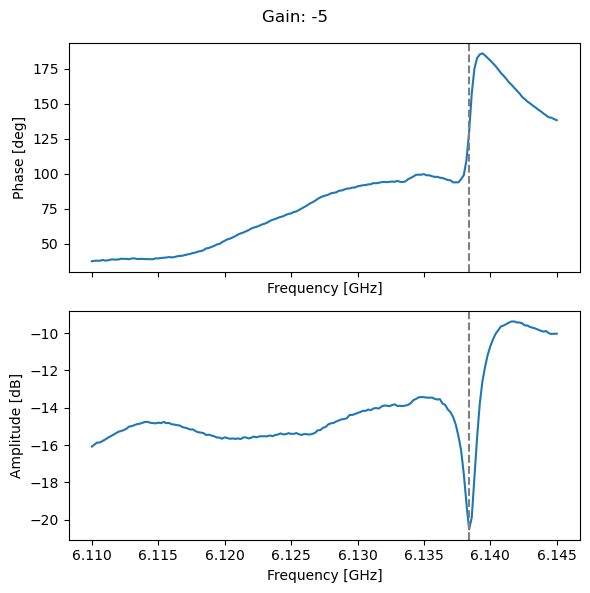

In [30]:
%matplotlib inline
fig,ax = plt.subplots(2,1,sharex=True, figsize=(6,6))
fig.suptitle('Gain: -5')
idx = np.where(data['sts_power']['gain'] == -5)[0][0]
ax[0].plot(data['sts_power']['freq'][idx,:], data['sts_power']['phase'][idx,:])
ax[0].set_xlabel('Frequency [GHz]')
ax[0].set_ylabel('Phase [deg]')
ax[1].plot(data['sts_power']['freq'][idx,:], data['sts_power']['amp'][idx,:])
ax[1].set_xlabel('Frequency [GHz]')
ax[1].set_ylabel('Amplitude [dB]')
ax[0].axvline(x=data['sts_power']['freq'][0,142],linestyle='dashed', color='gray')
ax[1].axvline(x=data['sts_power']['freq'][0,142],linestyle='dashed', color='gray')
fig.tight_layout()
plt.show()

## Map

In [5]:
voltage_period = 3.033
zero_flux = 1.3668

tts_dict = {key: data[key] for key in ['tts_upper','tts_lower','tts_left'] if key in data}

for key in ['tts_upper','tts_lower','tts_left']:
    tts_dict[key]['phi'] = (tts_dict[key]['flux']-zero_flux)/voltage_period
data['tts_zero']['phi'] = (data['tts_zero']['flux']-zero_flux)/voltage_period

In [6]:
fluxonium = sq.Fluxonium(EJ=10.013,EC=1.588,EL=0.3678, flux=0, cutoff=40)
flux_array1 = np.linspace(-0.5,0,3001)
fluxspec = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=flux_array1,
    evals_count=6,
    subtract_ground=False
)

evals_matrix = fluxspec.energy_table
transitions0 = evals_matrix - evals_matrix[:,0].reshape(-1,1)
transitions1 = evals_matrix - evals_matrix[:,1].reshape(-1,1)
transitions2 = evals_matrix - evals_matrix[:,2].reshape(-1,1)

transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)

flux_array2 = np.linspace(data['tts_zero']['phi'].min(),data['tts_zero']['phi'].max(),201)
fluxspec2 = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=flux_array2,
    evals_count=3,
    subtract_ground=False
)

evals_matrix2 = fluxspec2.energy_table
transitions0_2 = evals_matrix2 - evals_matrix2[:,0].reshape(-1,1)

transitions0_2 = np.delete(transitions0_2,0,axis=1)


Spectral data:   0%|          | 0/3001 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

In [29]:
flux_array = np.linspace(-0.5, 0.5, 501)
fluxspec = fluxonium.get_spectrum_vs_paramvals(
    param_name='flux',
    param_vals=flux_array,
    evals_count=6,
    subtract_ground=False
)
evals_matrix = fluxspec.energy_table

Spectral data:   0%|          | 0/501 [00:00<?, ?it/s]

Text(0.5, 0, '$\\Phi/\\Phi_0$')

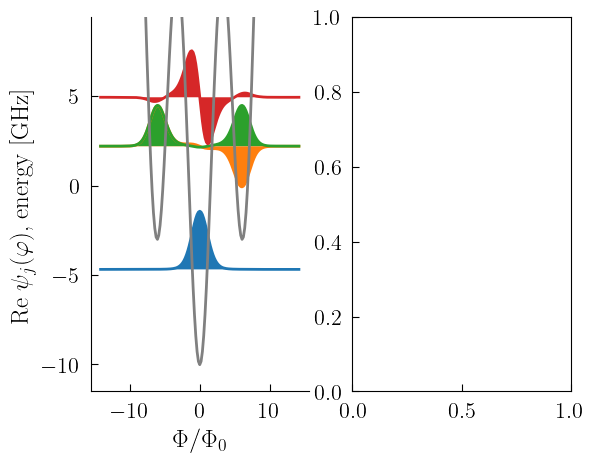

In [46]:
latex_style(True)
fig, ax = plt.subplots(1,2)
fluxonium.plot_wavefunction(which=[0,1,2,3], scaling=0.5, fig_ax=(fig,ax[0]))
ax[0].set_xlabel(r'$\Phi/\Phi_0$')

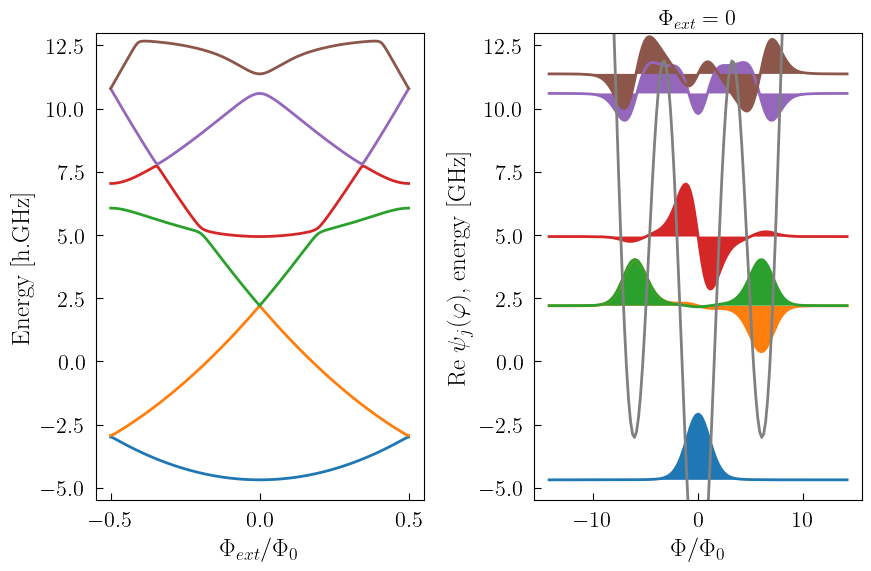

In [65]:
fig, ax = plt.subplots(1,2, figsize=(9,6), sharey= True)
ax[0].plot(flux_array, evals_matrix[:,:6])
ax[0].set_xlabel(r'$\Phi_{ext}/\Phi_0$')
ax[0].set_ylabel(r'Energy [h.GHz]')
ax[0].set_ylim([-5.5,13])

fluxonium.plot_wavefunction(which=[0,1,2,3,4,5], scaling=0.4, fig_ax=(fig,ax[1]))
for spine in ax[1].spines.values():
        spine.set_visible(True)
ax[1].set_xlabel(r'$\Phi/\Phi_0$')
ax[1].set_ylim([-5.5,13])
ax[1].set_title(r'$\Phi_{ext} = 0$')
fig.tight_layout()
plt.show()

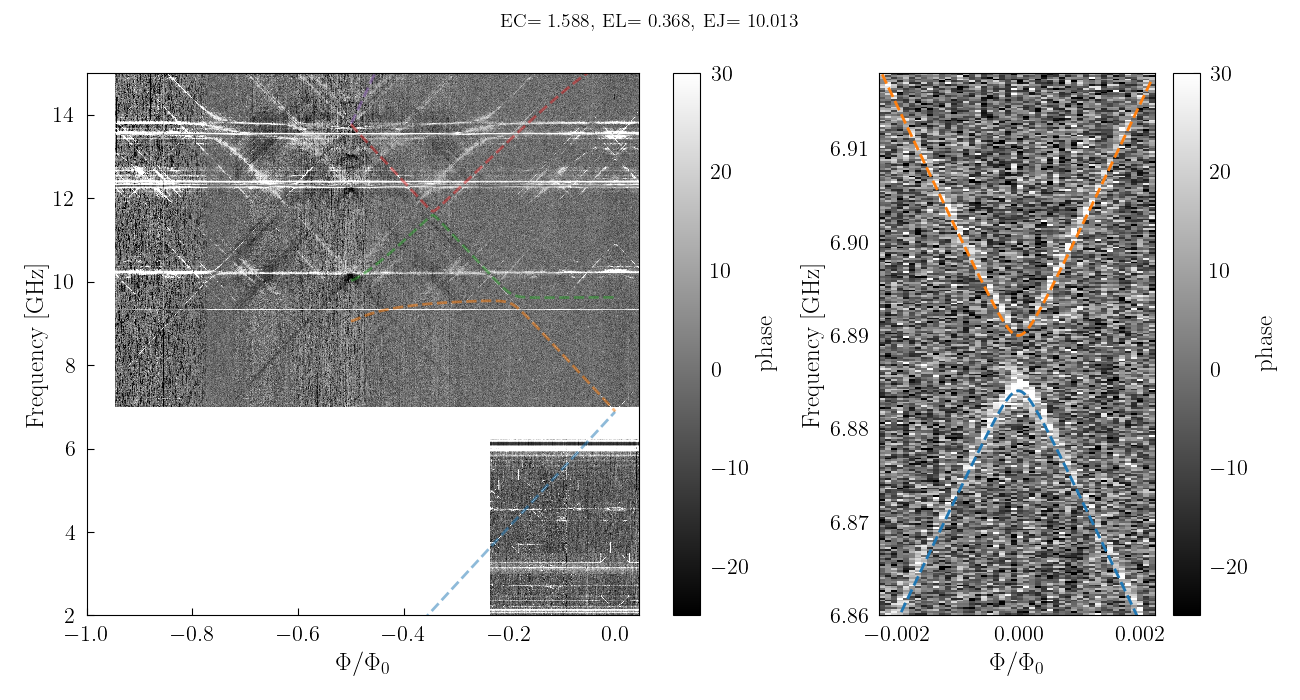

In [66]:
%matplotlib widget
latex_style(True)
fig,ax = plt.subplots(1,2, figsize=(13,7), gridspec_kw={'width_ratios': [2, 1]})
fig.suptitle(f'EC= {np.round(fluxonium.EC,3)}, EL= {np.round(fluxonium.EL,3)}, EJ= {np.round(fluxonium.EJ,3)}', fontsize=14)
plot3Ds(
    data_dicts=tts_dict,
    x_key='phi',
    y_key='freq',
    z_key='phase',
    flatten_vertical=1,
    flatten_horizontal=0,
    ax=ax[0],
    fig=fig,
    vmin=-25,
    vmax=30,
    cmap='gray'
)

plot3D(
    data_dict=data['tts_zero'],
    x_key='phi',
    y_key='freq',
    z_key='phase',
    ax=ax[1],
    flatten_vertical=1,
    fig=fig,
    vmin=-25,
    vmax=30,
    cmap='gray',
)

ax[0].plot(flux_array1,transitions0, alpha=0.5,linestyle='dashed',linewidth=2)
# ax[0].plot(flux_array1,transitions1, alpha=0.5,color='C1',linestyle='dashed',linewidth=0.8)
ax[0].set_xlim(left=-1)
ax[0].set_ylim([2,15])


ax[1].plot(flux_array2,transitions0_2, alpha=1,linestyle='--',linewidth=2)
ax[1].set_ylim(bottom=6.86)


ax[0].set_xlabel(r'$\Phi/\Phi_0$')
ax[0].set_ylabel(r'Frequency [GHz]')
ax[1].set_xlabel(r'$\Phi/\Phi_0$')
ax[1].set_ylabel(r'Frequency [GHz]')
plt.tight_layout()
plt.show()

### Double levels

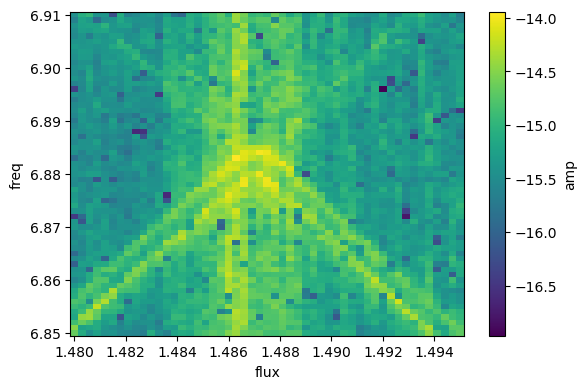

In [138]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
plot3D(
    data_dict=data['tts_double'],
    x_key='flux',
    y_key='freq',
    z_key='amp',
    ax=ax,
    flatten_vertical=0,
    fig=fig
)
plt.show()

### Flux drifting

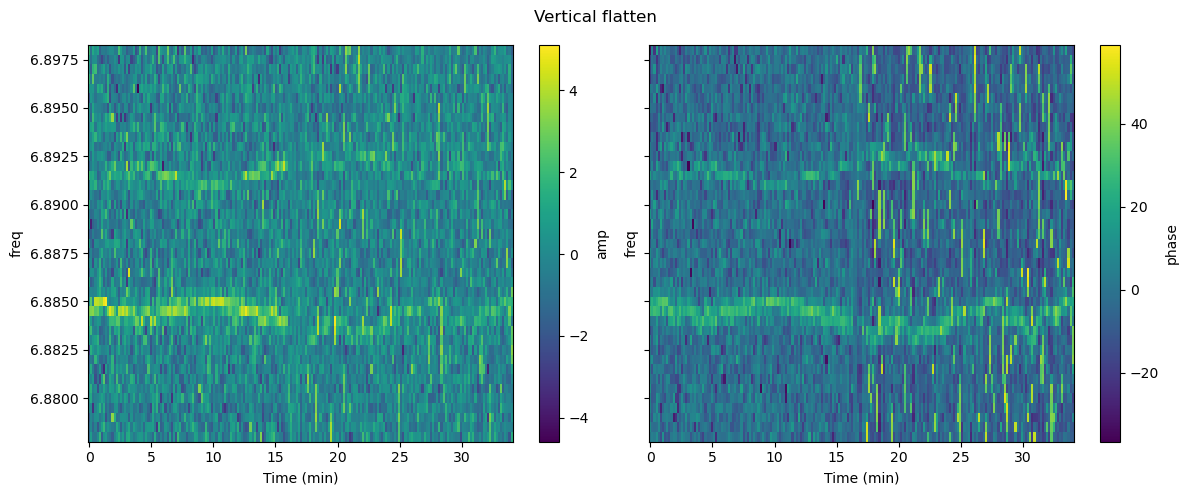

In [11]:
data['flux_drifting']['time'] = np.linspace(0,34,200)

fig, ax = plt.subplots(1,2,figsize=(12,5), sharey=True)
fig.suptitle('Vertical flatten')
plot3D(
    data_dict=data['flux_drifting'],
    x_key='time',
    y_key='freq',
    z_key='amp',
    ax=ax[0],
    flatten_vertical=1,
    fig=fig
)

plot3D(
    data_dict=data['flux_drifting'],
    x_key='time',
    y_key='freq',
    z_key='phase',
    ax=ax[1],
    flatten_vertical=1,
    fig=fig
)
ax[0].set_xlabel('Time (min)')
ax[1].set_xlabel('Time (min)')
plt.show()

# Time domain measurements

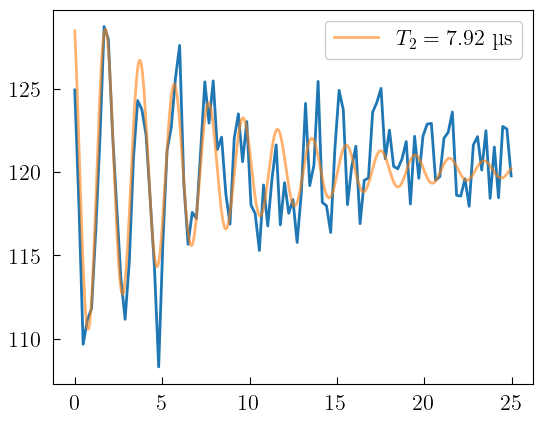

In [139]:
def rabi_func(x, A0, A1, A2, w_R, TR):
    return A0 + A1 * np.cos(w_R * x + A2) * np.exp(-x / TR)

def T1_func(x, A0, A1, T1):
    return A0 + A1 * np.exp(-x / T1)

def ramsey_func(x, A0, A1, A2, w_qd, T2):
    return A0 + A1 * np.cos(w_qd*x+A2)*np.exp(-x/T2)

popt_rabi, pcov_rabi = curve_fit(rabi_func, data['rabi']['pulse_length_ns'], data['rabi']['amp'], p0=(-22.2, 0.7, np.pi, 2*np.pi/150,1000))
popt_t1, pcov_t1 = curve_fit(T1_func, data['t1']['param']/1e3, data['t1']['amp'], p0=(-22.6, -0.7, 100))
popt_t2, pcov_t2 = curve_fit(ramsey_func, data['ramsey']['delay_ns']/1e3, data['ramsey']['amp'], p0=(-21.75, 0.8, 0,np.pi, 3))

hahn_echo_data = load_data(filedirectory+str(427415))
i=2
x = hahn_echo_data['delay_ns'][i,:]*1e-3
x_interpol = np.linspace(x.min(),x.max(), 1000)
y = hahn_echo_data['phase'][i,:]
popt_echo, pcov_echo = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)/2))

fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.plot(x_interpol,ramsey_func(x_interpol,*popt_echo), alpha=0.6,label=rf'$T_2 = {np.round(popt_echo[-1],2)}$ µs')
ax.legend()
plt.show()

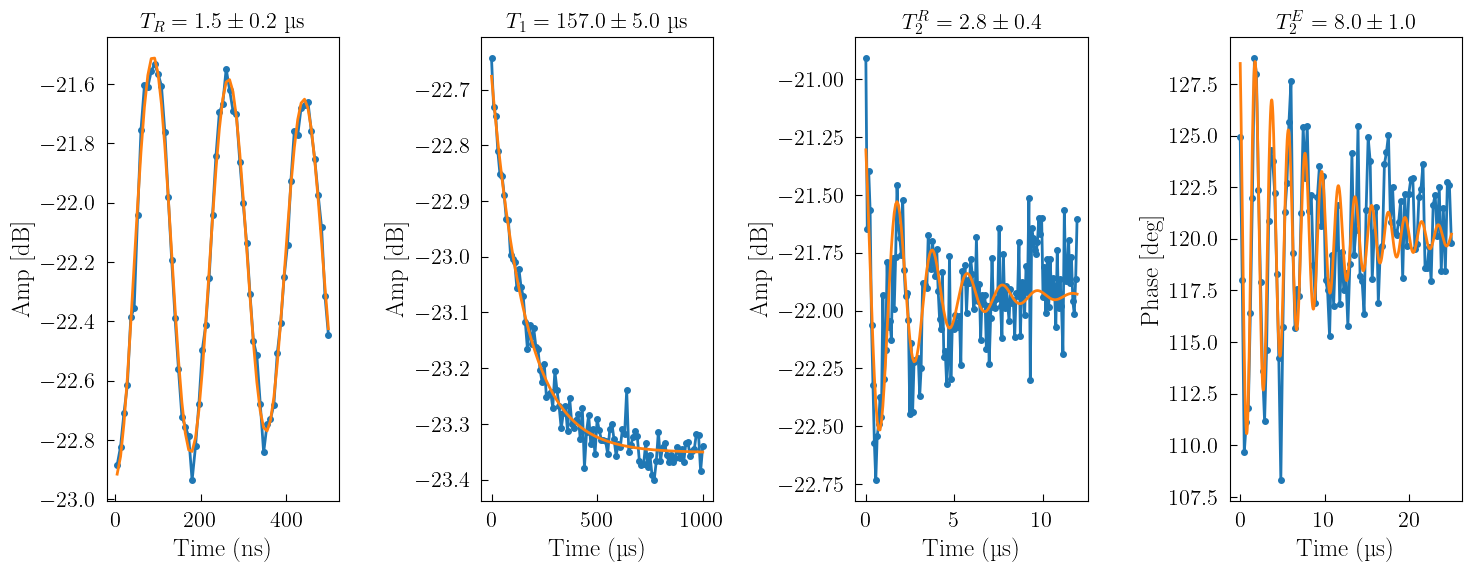

In [146]:
fig,ax = plt.subplots(1,4, figsize=(15,6))
ax[0].plot(data['rabi']['pulse_length_ns'], data['rabi']['amp'],'o-',markersize=4)
ax[0].plot(data['rabi']['pulse_length_ns'], rabi_func(data['rabi']['pulse_length_ns'],*popt_rabi))
ax[0].set_title(rf"$T_R= {np.round(popt_rabi[-1]/1e3,1)} \pm {np.round(np.sqrt(pcov_rabi[-1,-1])/1e3,1)}$ µs")
ax[0].set_xlabel('Time (ns)')
ax[0].set_ylabel('Amp [dB]')

ax[1].plot(data['t1']['param']/1e3, data['t1']['amp'],'o-',markersize=4)
ax[1].plot(data['t1']['param']/1e3, T1_func(data['t1']['param']/1e3,*popt_t1))
ax[1].set_title(rf"$T_1= {np.round(popt_t1[2],0)} \pm {np.round(np.sqrt(pcov_t1[2,2]),0)}$ µs")
ax[1].set_xlabel('Time (µs)')
ax[1].set_ylabel('Amp [dB]')

ax[2].plot(data['ramsey']['delay_ns']/1e3, data['ramsey']['amp'],'o-',markersize=4)
ax[2].plot(data['ramsey']['delay_ns']/1e3, ramsey_func(data['ramsey']['delay_ns']/1e3,*popt_t2))
ax[2].set_title(rf"$T_2^R= {np.round(popt_t2[-1],1)} \pm {np.round(np.sqrt(pcov_t2[-1,-1]),1)}$")
ax[2].set_xlabel('Time (µs)')
ax[2].set_ylabel('Amp [dB]')

i=2
x_interpol = np.linspace(hahn_echo_data['delay_ns'][i,:].min()/1e3,hahn_echo_data['delay_ns'][i,:].max()/1e3, 1000)
ax[3].plot(hahn_echo_data['delay_ns'][i,:]/1e3, hahn_echo_data['phase'][i,:],'o-',markersize=4)
ax[3].plot(x_interpol, ramsey_func(x_interpol,*popt_echo))
ax[3].set_title(rf"$T_2^E= {np.round(popt_echo[-1],0)} \pm {np.round(np.sqrt(pcov_echo[-1,-1]),0)}$")
ax[3].set_xlabel('Time (µs)')
ax[3].set_ylabel('Phase [deg]')

fig.tight_layout()
plt.show()

## Rabi Chevron

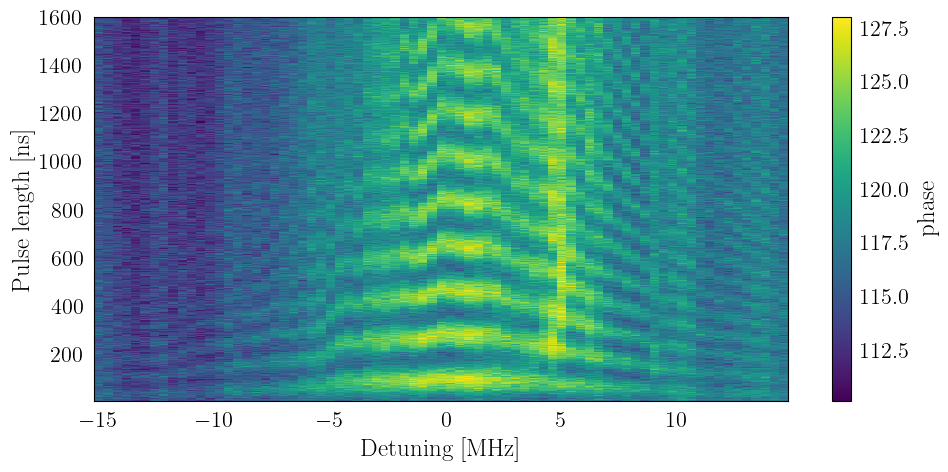

In [151]:
fig,ax = plt.subplots(1,1, figsize=(10,5))

plot3D(
    data_dict=data['rabi_chevron'],
    x_key='detuning',
    y_key='pulse_length_ns',
    z_key='phase',
    ax=ax,
    flatten_vertical=0,
    fig=fig
)

ax.set_xlabel('Detuning [MHz]')
ax.set_ylabel('Pulse length [ns]')

fig.tight_layout()
plt.show()

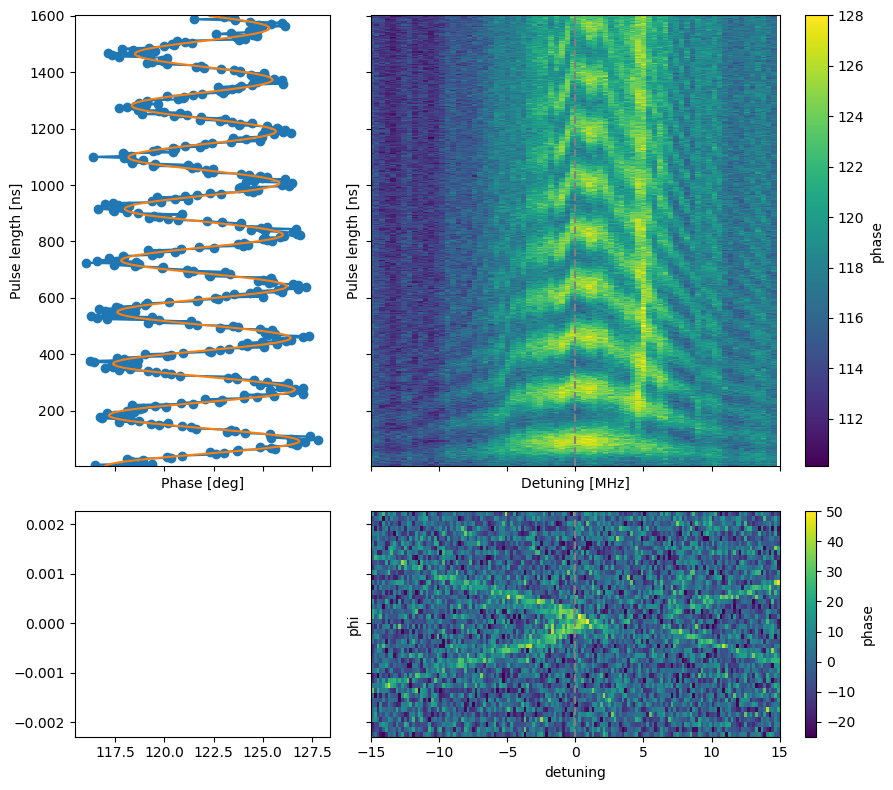

In [133]:
fig,ax = plt.subplots(2,2,figsize=(9,8),sharex='col', sharey='row', gridspec_kw={'width_ratios': [1, 2], 'height_ratios': [2, 1]})

zero_idx = 40
popt_rabi_chevron, pcov_rabi_chevron = curve_fit(rabi_func, data['rabi_chevron']['pulse_length_ns'][0], data['rabi_chevron']['phase'][zero_idx], p0=(102, 4, np.pi, 2*np.pi/150,1000))


ax[0,0].plot(data['rabi_chevron']['phase'][zero_idx], data['rabi_chevron']['pulse_length_ns'][0], 'o-')
ax[0,0].plot(rabi_func(data['rabi_chevron']['pulse_length_ns'][0],*popt_rabi_chevron), data['rabi_chevron']['pulse_length_ns'][0])

plot3D(
    data_dict=data['rabi_chevron'],
    x_key='detuning',
    y_key='pulse_length_ns',
    z_key='phase',
    ax=ax[0,1],
    flatten_vertical=0,
    fig=fig
)

ax[0, 1].sharey(ax[0, 0])

data['tts_zero']['detuning'] = (data['tts_zero']['freq'] - 6.8843)*1e3
plot3D(
    data_dict=data['tts_zero'],
    x_key='detuning',
    y_key='phi',
    z_key='phase',
    ax=ax[1,1],
    flatten_horizontal=1,
    fig=fig,
    vmin=-25,
    vmax=50,
    cmap='viridis',
)

ax[1,1].set_xlim([data['rabi_chevron']['detuning'].min(),15])
ax[0,1].axvline(x=0, color='gray', linestyle='dashed')
ax[1,1].axvline(x=0, color='gray', linestyle='dashed')
ax[0,1].set_xlabel('Detuning [MHz]')
ax[0,1].set_ylabel('Pulse length [ns]')
ax[0,0].set_xlabel('Phase [deg]')
ax[0,0].set_ylabel('Pulse length [ns]')

plt.show()

## Ramsey fringes

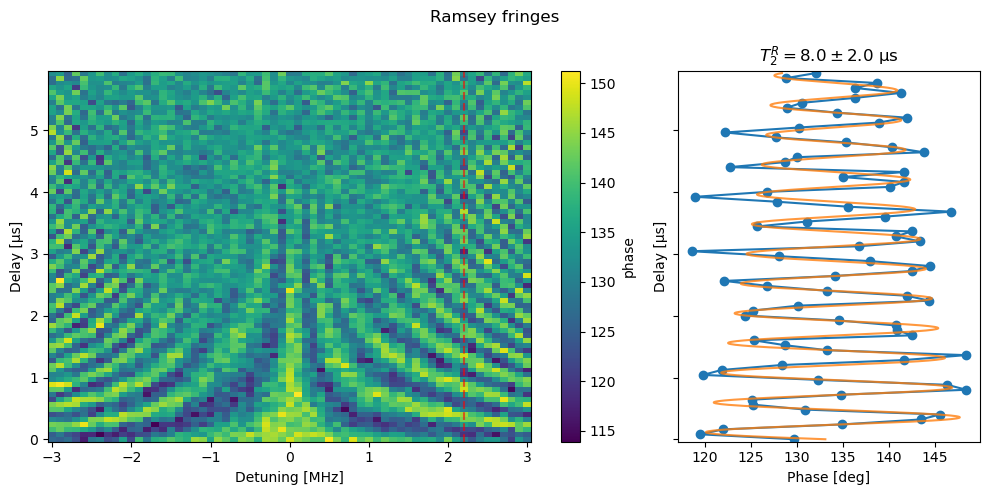

In [531]:
ramsey_fringes = load_data(filedirectory+str(430723))
ramsey_fringes['detuning'] = ramsey_fringes['detuning']*1e-6
ramsey_fringes['delay_ns'] = ramsey_fringes['delay_ns']*1e-3

idx = -9
x = ramsey_fringes['delay_ns'][idx]
y = ramsey_fringes['phase'][idx]
x_interpol = np.linspace(x.min(), x.max(),1001)
popt_ramsey, pcov_ramsey = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)/5))


fig,ax = plt.subplots(1,2, figsize=(10,5), sharey = True, gridspec_kw={'width_ratios': [2,1]})
ax[1].plot(ramsey_fringes['phase'][idx], x, 'o-')
ax[1].plot(ramsey_func(x_interpol,*popt_ramsey),x_interpol, alpha=0.8)

plot3D(
    data_dict=ramsey_fringes,
    x_key='detuning',
    y_key='delay_ns',
    z_key='phase',
    fig=fig,
    ax=ax[0]
)
ax[0].axvline(x = ramsey_fringes['detuning'][idx], color='red',linestyle='dashed', alpha = 0.6)
ax[1].set_xlabel('Phase [deg]')
ax[1].set_ylabel('Delay [µs]')
ax[0].set_ylabel('Delay [µs]')
fig.suptitle('Ramsey fringes')
ax[0].set_xlabel('Detuning [MHz]')
ax[1].set_title(rf'$T_2^R = {np.round(popt_ramsey[-1],0)} \pm {np.round(np.sqrt(pcov_ramsey[-1,-1]),0)}$ µs')

fig.tight_layout()
plt.show()

In [24]:
ramsey_np_avg = load_data(filedirectory+str(431347))
length = len(ramsey_np_avg['phase'])
print(length)

def plot_with_avg(avg):
    phase_avg = np.mean(ramsey_np_avg['phase'][(length - avg):], 0)
    # phase_avg = np.mean(ramsey_np_avg['phase'][:avg], 0)
    fig, ax = plt.subplots(1, 1)
    ax.plot(ramsey_np_avg['delay_ns'][0], phase_avg)
    ax.set_ylim([100,150])
    plt.show()

# Crear el widget interactivo
interact(plot_with_avg, avg=IntSlider(min=1, max=length, step=1))

441


interactive(children=(IntSlider(value=1, description='avg', max=441, min=1), Output()), _dom_classes=('widget-…

<function __main__.plot_with_avg(avg)>

## Hahn echo

In [68]:
hahn_echo_data = load_data(filedirectory+str(427415))

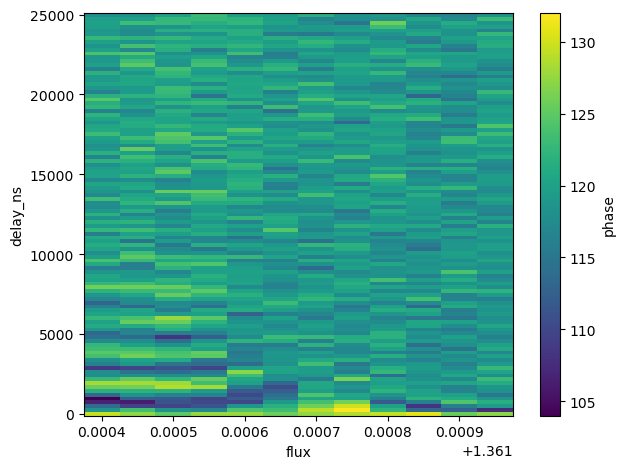

In [365]:
fig,ax = plt.subplots(1,1)

plot3D(
    data_dict=hahn_echo_data,
    x_key='flux',
    y_key='delay_ns',
    z_key='phase',
    flatten_vertical=0,
    fig=fig,
    ax=ax
)
plt.show()

In [72]:
def ramsey_func(x, A0, A1, A2, w_qd, T2):
    return A0 + A1 * np.cos(w_qd*x+A2)*np.exp(-x/T2)

popt_echo_list = []
pcov_echo_list = []

for i in range(len(hahn_echo_data['flux'])):
    x = hahn_echo_data['delay_ns'][i,:]*1e-3
    y = hahn_echo_data['phase'][i,:]
    popt_echo, pcov_echo = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)))
    popt_echo_list.append(popt_echo)
    pcov_echo_list.append(pcov_echo)
    
popt_echo_list = np.array(popt_echo_list)
pcov_echo_list = np.array(pcov_echo_list)

In [393]:
popt_echo_list[:,-1]

array([ 4.28622394e+00,  5.57592488e+00, -2.63578083e+04,  5.27616355e+00,
       -1.25735303e+06,  1.88941001e+00,  3.33265887e-01,  1.54329053e+00,
        1.33411980e+00,  4.27300799e+01, -4.42243430e+05, -4.30762836e+06])

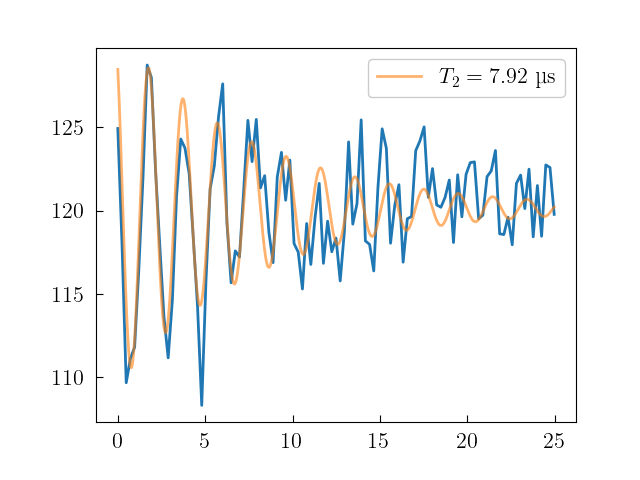

In [80]:
i=2
x = hahn_echo_data['delay_ns'][i,:]*1e-3
x_interpol = np.linspace(x.min(),x.max(), 1000)
y = hahn_echo_data['phase'][i,:]
popt_echo, pcov_echo = curve_fit(ramsey_func, x, y, p0=(np.mean(x), np.ptp(y)/2, 0, 2*np.pi/(np.ptp(x)),np.ptp(x)/2))

fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.plot(x_interpol,ramsey_func(x_interpol,*popt_echo), alpha=0.6,label=rf'$T_2 = {np.round(popt_echo[-1],2)}$ µs')
ax.legend()
plt.show()

In [417]:
np.sqrt(pcov_echo[-1,-1])

1.2332220164815006

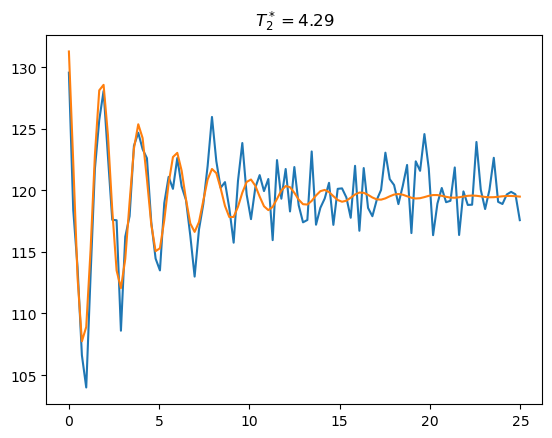

In [382]:
fig,ax = plt.subplots(1,1)
# ax.set_title(rf'$T_2^* = {np.round(popt_echo[-1], 2)}$')
ax.plot(x, hahn_echo_data['phase'][0,:])
ax.plot(x, ramsey_func(x,*popt_echo))
plt.show()

Temporal

In [768]:
file_path = filedirectory+str(503386)+'.hdf'

import h5py
import yaml
import numpy as np
    
    
with h5py.File(file_path, 'r') as file:
    # print(list(file.attrs))
    # print(file.attrs['parameters'])
    print(file['children']['0']['table'].shape)
    # print(list(file['children']['0'].keys()))
    # print(file['children']['0']['table'])

(61, 5)
